In [ ]:
# html5lib,bs4,requests

In [163]:
import requests 
from bs4 import BeautifulSoup 
from datetime import datetime
import time

In [164]:

schema = {
    "id" : "",
    "source":"www.99acres.com",
    "url":"https://www.99acres.com"+ listing_link,
    "short_url":"",
    "listing_date":"",
    "listing_modified_date":"",
    "updateds_date":time.time(),
    "created_date":time.time(),
    "title": "",
    "description":"",
    "category": "rent",
    "type":"",
    "rent": "",
    "lease":False,
    "is_available": True ,
    "availability_date":"",
    "accomodation_type":"", 
    "age":"",
    "area":"",
    "total_floor":"",
    "floor_location":"",
    "floor_count": 1,
    "has_basement":False ,
    "has_terrace":False ,
    "balcony_count":"",
    "bathroom_count": "",
    "bedroom_count": "",
    "facing":"",
    "furnishing":"",
    "maintenance": 0,    
    "parking_2_wheeler":"",
    "parking_4_wheeler":False,
    "parking_is_covered":True,
    "parking_is_reserved":True,
    "swimmingPool": "",
    "security" : "",
    "lift" : "",
    "gym": "",
    "club": "",
    "park":"", 
    "waterSuppy":"",
    "powerBackup":"",
    "address":"",
    "locality": 0,
    "pincode":"",
    "city":"chennai",
    "state":"",
    "latitude":"",
    "longitude":""
}

In [239]:
URL ="https://www.99acres.com/search/property/rent/besant-nagar-chennai-south?city=34&locality=554&preference=R&area_unit=1&budget_min=0&res_com=R"
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
page = requests.get(URL,headers=headers) 
soup = BeautifulSoup(page.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib 

In [234]:
listings = soup.findAll('a', attrs = {'class':'body_med srpTuple__propertyName'}) 
titles = soup.findAll('td', attrs = {'id':'srp_tuple_society_heading'}) 
dataset = []

In [238]:
for i in range(len(listings)):
    print(i)
    data = schema
    print(listings[i]['href'])
    listing_detail_page = requests.get(url= "https://www.99acres.com"+  listings[i]['href'] )
    time.sleep(20)
    listing_page_soup = BeautifulSoup(listing_detail_page.content, 'html5lib')
#     print(listing_page_soup.prettify)
    data = {
    "id" : "",
    "source":"www.99acres.com",
    "url":"https://www.99acres.com"+ listings[i]['href'],
    "short_url":"",
    "listing_date":listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})\
                .text  if listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})else None,
    "listing_modified_date":listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'}) else None,
    "updateds_date":time.time(),
    "created_date":time.time(),
    "title": listings[i].find('h2').text + " " + titles[i].text,
    "description": listing_page_soup\
                .find('span', attrs = {'id':'description'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'description'}) else None,
    "category": "rent",
    "type": listing_page_soup\
                .find('div', attrs = {'class':'component__pdPropConfSide component__rentHeading pd__rentHeading'})\
                .text if listing_page_soup\
                .find('div', attrs = {'class':'component__pdPropConfSide component__rentHeading pd__rentHeading'}) else None,
    "rent": listing_page_soup\
                .find('span', attrs = {'id':'pdPrice2'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'pdPrice2'}) else None,
    "lease":False,
    "is_available": True ,
    "availability_date":time.time(),
    "accomodation_type":listing_page_soup\
                .find('span', attrs = {'id':'availableForLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'availableForLabel'}) else None, 
    "age":listing_page_soup\
                .find('span', attrs = {'id':'Age_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Age_Label'}) else None,
    "area":listing_page_soup\
                .find('span', attrs = {'id':'superbuiltupArea_span'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'superbuiltupArea_span'}) else None ,
    "total_floor": listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'}) else None,
    "floor_location": listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'}) else None,
    "floor_count": 1,
    "has_basement":False ,
    "has_terrace":False ,
    "balcony_count": listing_page_soup\
                .find('span', attrs = {'id':'balconyNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'balconyNum'}) else None,
    "bathroom_count": listing_page_soup\
                .find('span', attrs = {'id':'bathroomNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'bathroomNum'}) else None,
    "bedroom_count": listing_page_soup\
                .find('span', attrs = {'id':'bedRoomNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'bedRoomNum'}) else None,
    "facing":listing_page_soup\
                .find('span', attrs = {'id':'Facing_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Facing_Label'}) else None,
    "furnishing":listing_page_soup\
                .find('span', attrs = {'id':'furnishingLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'furnishingLabel'}) else None,
    "maintenance": 0,    
    "parking_2_wheeler":listing_page_soup\
                .find('span', attrs = {'id':'Reserved_Parking_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Reserved_Parking_Label'}) else None,
    "parking_4_wheeler":False,
    "parking_is_covered":True,
    "parking_is_reserved":True,
    "swimmingPool": "",
    "security" : "",
    "lift" : "",
    "gym": "",
    "club": "",
    "park":"", 
    "waterSuppy":"",
    "powerBackup":"",
    "address": listing_page_soup\
                .find('i', attrs = {'id':'address'})\
                .text if listing_page_soup\
                .find('i', attrs = {'id':'address'}) else None,
    "locality": 0,
    "pincode":"",
    "city":"chennai",
    "state":"",
    "latitude":"",
    "longitude":""}
    print(data['url'])
    print(data)
    dataset.append(data)
    

In [240]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n        <meta name="viewport" id="viewport"\n        content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no">\n        <meta name="robots" content="nofollow, noindex">\n        <title>99acres-India Real Estate Property Site</title>\n        <link href="/css/captchaVerify.css" rel="stylesheet">\n    </head>\n\n    <body>\n        <script type="text/javascript">\n                            if(document.getElementById(\'srpPage\') == null){\nif(typeof googleGaFlag=="undefined"){googleGaFlag=true;var _gaq=_gaq||[];_gaq.push([\'_setAccount\',\'UA-224016-1\']);_gaq.push([\'_setDomainName\',\'.99acres.com\']);_gaq.push([\'_trackPageview\']);(function(){var e=document.createElement(\'script\');e.type=\'text/javascript\';e.async=true;e.src = (\'https:\' == document.location.protocol ? \'https://\' : \'http://\') + \'stats.g.doubleclick.ne

In [189]:
import json


In [209]:
with open('dataset1.json', 'w') as outfile:
    json.dump(dataset, outfile)

In [213]:
dataset[-31:]

[{'id': '',
  'source': 'www.99acres.com',
  'url': 'https://www.99acres.com/3-bhk-bedroom-residential-apartments-for-rent-in-nul-besant-nagar-chennai-south-2800-sq-ft-spid-H51686756',
  'short_url': '',
  'listing_date': None,
  'listing_modified_date': None,
  'updateds_date': 1602428816.786619,
  'created_date': 1602428816.786619,
  'title': '3 BHK Residential Apartment for rent in Besant Nagar nul',
  'description': None,
  'category': 'rent',
  'type': None,
  'rent': None,
  'lease': False,
  'is_available': True,
  'availability_date': 1602428816.7883258,
  'accomodation_type': None,
  'age': None,
  'area': None,
  'total_floor': None,
  'floor_location': None,
  'floor_count': 1,
  'has_basement': False,
  'has_terrace': False,
  'balcony_count': None,
  'bathroom_count': None,
  'bedroom_count': None,
  'facing': None,
  'furnishing': None,
  'maintenance': 0,
  'parking_2_wheeler': None,
  'parking_4_wheeler': False,
  'parking_is_covered': True,
  'parking_is_reserved': Tru

<bound method Tag.prettify of <!DOCTYPE html>
<html data-reactroot="" lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><link data-react-helmet="true" href="https://www.99acres.com/3-bhk-bedroom-apartment-flat-for-rent-in-besant-nagar-chennai-south-2800-sq-ft-spid-H51686756" rel="canonical"/><title data-react-helmet="true">3 BHK / Bedroom Apartment / Flat for rent in Besant Nagar Chennai South - 2800 Sq. Ft.- 1st floor (out of 2)</title><meta content="2800 Sq. Ft. - Rent 3 BHK Apartment / Flat in Besant Nagar, Chennai South * 15 Property &amp; locality photos * Furnished * - 1st floor (out of 2). View contact number for free. Click for complete details on 99acres.com" data-react-helmet="true" name="description"/><link data-react-helmet="true" href="android-app://com.nnacres.app/https/www.99acres.com/3-bhk-bedroom-apartment-flat-for-rent-in-besant-nagar-chennai-south-2800-sq-ft-spid-H51686756" rel="alternate"/><meta content="IE=edge" http-equiv="X-UA-Co
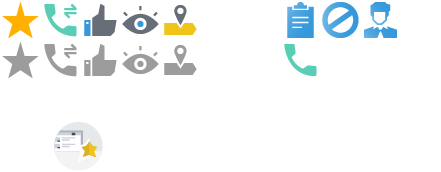
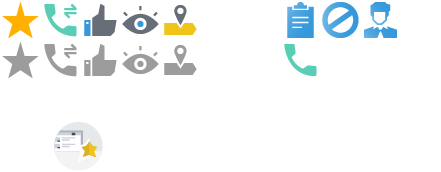

In [205]:
listing_detail_page = requests.get(url= "https://www.99acres.com/3-bhk-bedroom-residential-apartments-for-rent-in-nul-besant-nagar-chennai-south-2800-sq-ft-spid-H51686756" )
listing_page_soup = BeautifulSoup(listing_detail_page.content, 'html5lib')
print(listing_page_soup.prettify)
data = {
    "id" : "",
    "source":"www.99acres.com",
    "url":"https://www.99acres.com"+ listings[i]['href'],
    "short_url":"",
    "listing_date":listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})\
                .text  if listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})else None,
    "listing_modified_date":listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'postedOnAndByLabel'}) else None,
    "updateds_date":time.time(),
    "created_date":time.time(),
    "title": listings[i].find('h2').text + " " + titles[i].text,
    "description": listing_page_soup\
                .find('span', attrs = {'id':'description'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'description'}) else None,
    "category": "rent",
    "type": listing_page_soup\
                .find('div', attrs = {'class':'component__pdPropConfSide component__rentHeading pd__rentHeading'})\
                .text if listing_page_soup\
                .find('div', attrs = {'class':'component__pdPropConfSide component__rentHeading pd__rentHeading'}) else None,
    "rent": listing_page_soup\
                .find('span', attrs = {'id':'pdPrice2'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'pdPrice2'}) else None,
    "lease":False,
    "is_available": True ,
    "availability_date":time.time(),
    "accomodation_type":listing_page_soup\
                .find('span', attrs = {'id':'availableForLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'availableForLabel'}) else None, 
    "age":listing_page_soup\
                .find('span', attrs = {'id':'Age_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Age_Label'}) else None,
    "area":listing_page_soup\
                .find('span', attrs = {'id':'superbuiltupArea_span'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'superbuiltupArea_span'}) else None ,
    "total_floor": listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'}) else None,
    "floor_location": listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Floor_Num_Label'}) else None,
    "floor_count": 1,
    "has_basement":False ,
    "has_terrace":False ,
    "balcony_count": listing_page_soup\
                .find('span', attrs = {'id':'balconyNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'balconyNum'}) else None,
    "bathroom_count": listing_page_soup\
                .find('span', attrs = {'id':'bathroomNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'bathroomNum'}) else None,
    "bedroom_count": listing_page_soup\
                .find('span', attrs = {'id':'bedRoomNum'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'bedRoomNum'}) else None,
    "facing":listing_page_soup\
                .find('span', attrs = {'id':'Facing_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Facing_Label'}) else None,
    "furnishing":listing_page_soup\
                .find('span', attrs = {'id':'furnishingLabel'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'furnishingLabel'}) else None,
    "maintenance": 0,    
    "parking_2_wheeler":listing_page_soup\
                .find('span', attrs = {'id':'Reserved_Parking_Label'})\
                .text if listing_page_soup\
                .find('span', attrs = {'id':'Reserved_Parking_Label'}) else None,
    "parking_4_wheeler":False,
    "parking_is_covered":True,
    "parking_is_reserved":True,
    "swimmingPool": "",
    "security" : "",
    "lift" : "",
    "gym": "",
    "club": "",
    "park":"", 
    "waterSuppy":"",
    "powerBackup":"",
    "address": listing_page_soup\
                .find('i', attrs = {'id':'address'})\
                .text if listing_page_soup\
                .find('i', attrs = {'id':'address'}) else None,
    "locality": 0,
    "pincode":"",
    "city":"chennai",
    "state":"",
    "latitude":"",
    "longitude":""}

In [206]:
data

{'id': '',
 'source': 'www.99acres.com',
 'url': 'https://www.99acres.com/3-bhk-bedroom-residential-apartments-for-rent-in-kgeyes-eternity-besant-nagar-chennai-south-1801-sq-ft-spid-N52042704',
 'short_url': '',
 'listing_date': 'Owner on Sep 08, 2020',
 'listing_modified_date': 'Owner on Sep 08, 2020',
 'updateds_date': 1602428783.7247648,
 'created_date': 1602428783.724766,
 'title': '3 BHK Residential Apartment for rent in Besant Nagar Kgeyes Eternity',
 'description': ' Are you looking for an affordable property to rent with good amenities and in a great location?. Then this is home for you.This beautiful 2000 sqft 1st floor apartment has lot of natural light and ventilation. The unit features 3 bedrooms 3 bathrooms a large living room leading to the dining area and a study which has views of the beach. The large modular kitchen has plenty of storage , granite counter tops and a gas stove with a hood. The master bedroom is separated from the other bedrooms and has an attached wardr

In [200]:
dataset

[{'id': '',
  'source': 'www.99acres.com',
  'url': 'https://www.99acres.com/3-bhk-bedroom-residential-apartments-for-rent-in-nul-besant-nagar-chennai-south-2800-sq-ft-spid-H51686756',
  'short_url': '',
  'listing_date': None,
  'listing_modified_date': None,
  'updateds_date': 1602428094.685266,
  'created_date': 1602428094.685266,
  'title': '',
  'description': None,
  'category': 'rent',
  'type': None,
  'rent': None,
  'lease': False,
  'is_available': True,
  'availability_date': 1602428094.6867762,
  'accomodation_type': None,
  'age': None,
  'area': None,
  'total_floor': None,
  'floor_location': None,
  'floor_count': 1,
  'has_basement': False,
  'has_terrace': False,
  'balcony_count': None,
  'bathroom_count': None,
  'bedroom_count': None,
  'facing': None,
  'furnishing': None,
  'maintenance': 0,
  'parking_2_wheeler': None,
  'parking_4_wheeler': False,
  'parking_is_covered': True,
  'parking_is_reserved': True,
  'swimmingPool': '',
  'security': '',
  'lift': '',